In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("Real_Estate.csv")

In [4]:
data

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


# Starting with EDA

### Relationship between House age and price

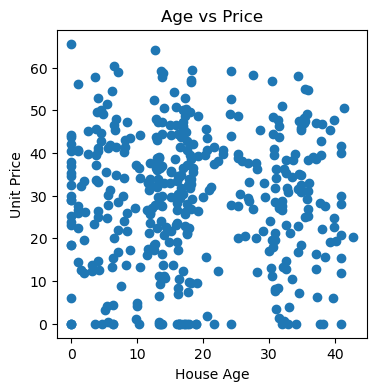

In [8]:
plt.figure(figsize=(4,4))
plt.scatter(data['House age'], data['House price of unit area'])
plt.title("Age vs Price")
plt.xlabel('House Age')
plt.ylabel('Unit Price')
plt.show()

<div>
    No linear relationship found bwtween House age and Price
</div>

### Relationship between Distance to the nearest MRT station and Price

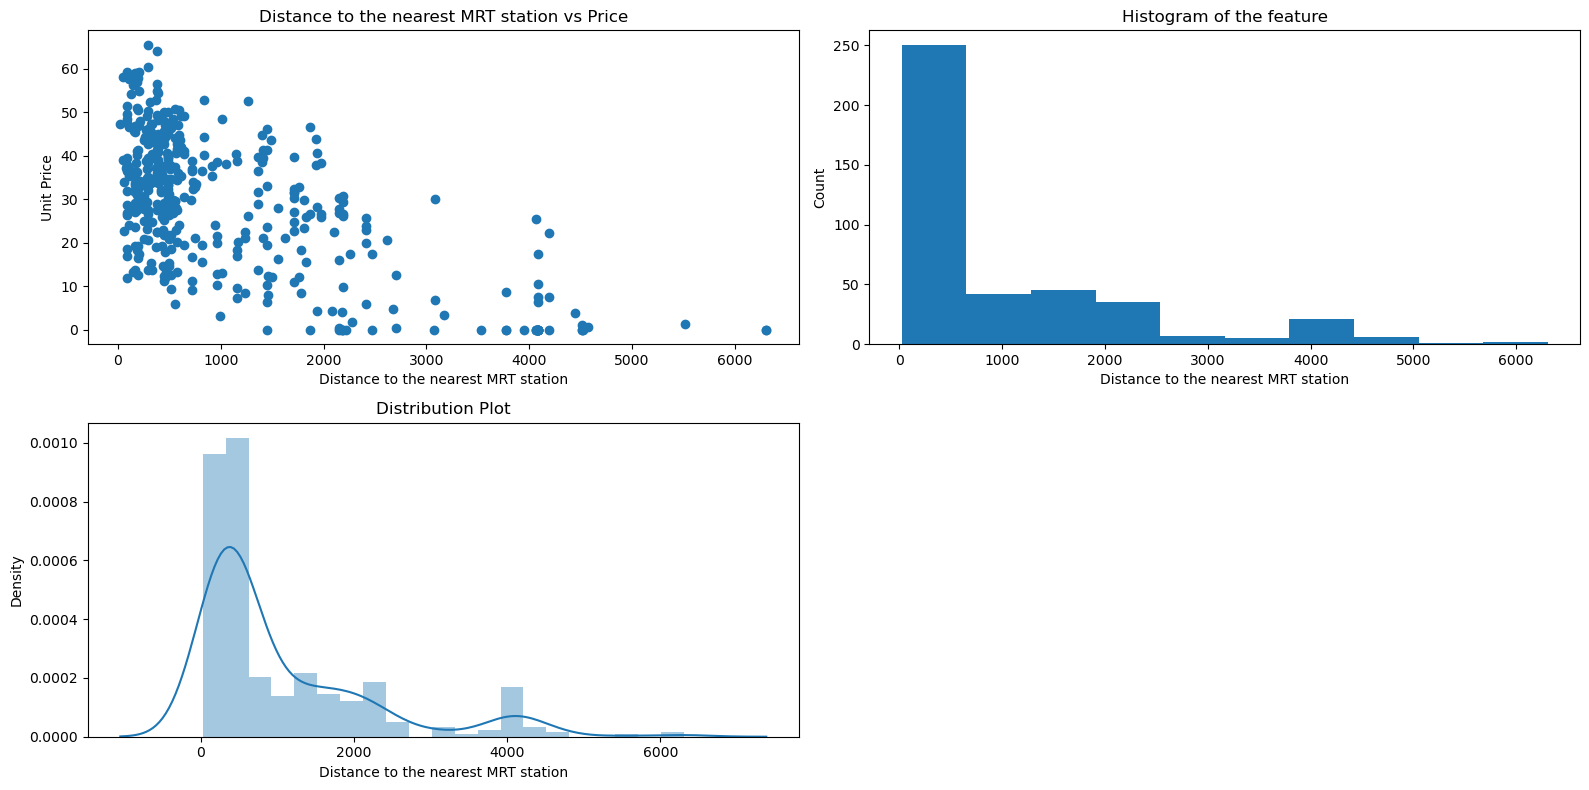

In [24]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
plt.scatter(data['Distance to the nearest MRT station'], data['House price of unit area'])
plt.title("Distance to the nearest MRT station vs Price")
plt.xlabel('Distance to the nearest MRT station')
plt.ylabel('Unit Price')

plt.subplot(2,2,2)
plt.hist(x=data['Distance to the nearest MRT station'])
plt.title('Histogram of the feature')
plt.xlabel('Distance to the nearest MRT station')
plt.ylabel('Count')

plt.subplot(2,2,3)
sns.distplot(data['Distance to the nearest MRT station'])
plt.title('Distribution Plot')

plt.tight_layout()
plt.show()

<div>
    <ol>
        <li>From the first graph, we see that lower the distance, the more price it is.</li>
        <li>From the second graph, we see that most number of houses are in short distances of the station</li>
    </ol>
</div>

### Relationship between Number of convenience stores and Price

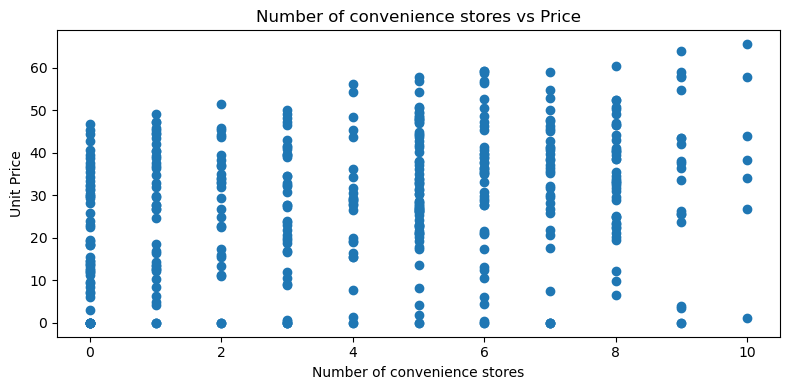

In [33]:
plt.figure(figsize=(8,4))
plt.scatter(data['Number of convenience stores'], data['House price of unit area'])
plt.title("Number of convenience stores vs Price")
plt.xlabel('Number of convenience stores')
plt.ylabel('Unit Price')

plt.tight_layout()
plt.show()

<div>
    Not a direct realtion found, but still as the number of stores increases the price also goes up
</div>

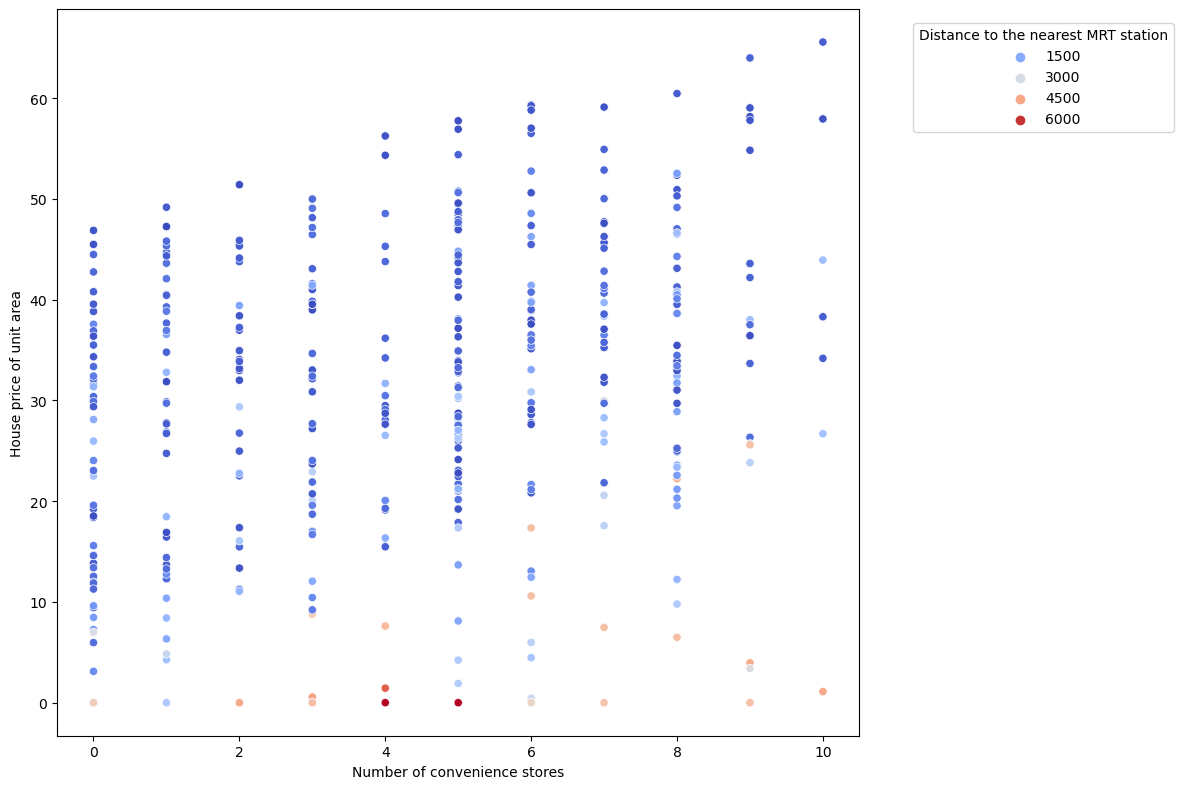

In [56]:
plt.figure(figsize=(12,8))
plot = sns.scatterplot(data, x=data['Number of convenience stores'], y=data['House price of unit area'],
                hue=data['Distance to the nearest MRT station'], palette='coolwarm')
plot.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=1, title='Distance to the nearest MRT station')
plt.tight_layout()
plt.show()

### Relation of latitude and longitude with price

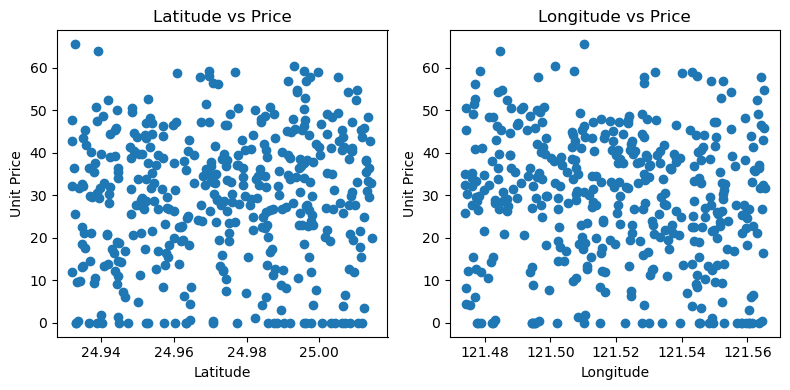

In [57]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.scatter(data['Latitude'], data['House price of unit area'])
plt.title("Latitude vs Price")
plt.xlabel('Latitude')
plt.ylabel('Unit Price')

plt.subplot(1,2,2)
plt.scatter(data['Longitude'], data['House price of unit area'])
plt.title("Longitude vs Price")
plt.xlabel('Longitude')
plt.ylabel('Unit Price')

plt.tight_layout()
plt.show()

<div>
    No realtion found
</div>

##### So only 2 features were having some relationshio with the price:  

<div>
    <ol>
        <li>Number of convenience stores</li>
        <li>Distance to the nearest MRT station</li>
    </ol>
</div>

#### Correlation

In [58]:
corr_mat = data.corr(numeric_only=True)

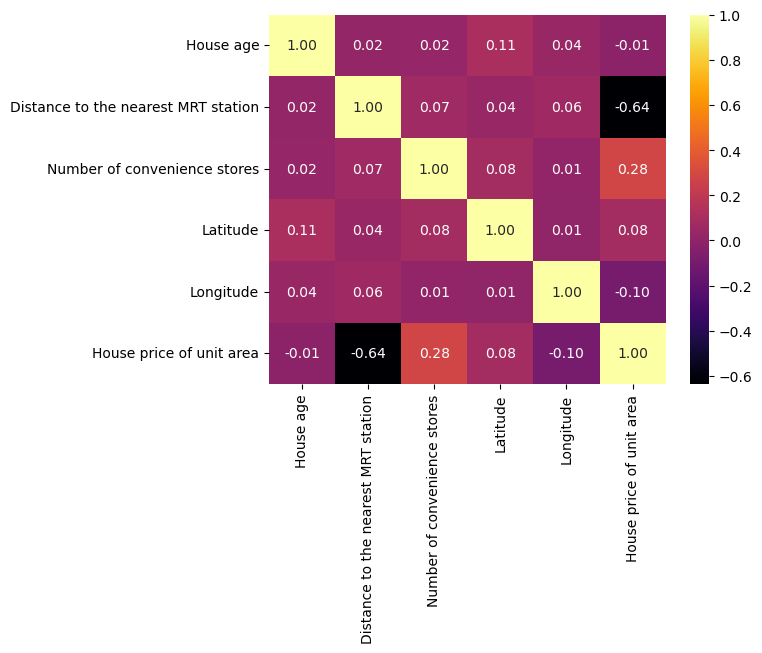

In [61]:
sns.heatmap(corr_mat, cmap='inferno', annot=True, fmt='.2f')
plt.show()

## Preprocessing

In [64]:
df = data[['Distance to the nearest MRT station', 'Number of convenience stores', 'House price of unit area']]
df.reset_index()
df

,Distance to the nearest MRT station,Number of convenience stores,House price of unit area
0,4082.01500,8,6.488673
1,274.01440,2,24.970725
2,1978.67100,10,26.694267
3,1055.06700,5,38.091638
4,967.40000,6,21.654710
...,...,...,...
409,170.12890,6,29.096310
410,323.69120,2,33.871347
411,451.64190,8,25.255105
412,292.99780,5,25.285620


In [65]:
df.isnull().sum().sum()

0

In [68]:
df.rename(columns={
    'Distance to the nearest MRT station': "Distance to Station",
    'Number of convenience stores': "Stores",
    'House price of unit area': "Unit Price"
}, inplace=True)
df

,Distance to Station,Stores,Unit Price
0,4082.01500,8,6.488673
1,274.01440,2,24.970725
2,1978.67100,10,26.694267
3,1055.06700,5,38.091638
4,967.40000,6,21.654710
...,...,...,...
409,170.12890,6,29.096310
410,323.69120,2,33.871347
411,451.64190,8,25.255105
412,292.99780,5,25.285620


#### scaling and train test split

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.drop('Unit Price', axis=1, inplace=False)
y = df['Unit Price']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=47)

## Model Building

In [81]:
from sklearn.linear_model import LinearRegression, Ridge

lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

#### Model accuracy and other metrics

In [74]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error

#predictions
y_pred = lm.predict(X_test)

print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.5126190865379863
9.387903819171136
125.07750121153049


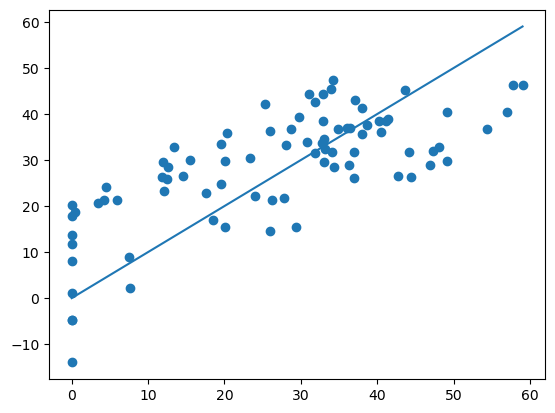

In [84]:
plt.scatter(x=y_test, y=y_pred, label='Data Points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], label='Regression Line')
plt.show()

## Using Ridge

In [85]:
ridge = Ridge()

ridge.fit(X_train, y_train)

Ridge()

In [87]:
y_pred = ridge.predict(X_test)

In [88]:
r2_score(y_test, y_pred)

0.508803078812031

## Using Lasso

In [89]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

In [90]:
r2_score(y_test, y_pred)

0.3400118129496573

## The best accuracy is coming from the Normal Linear Regression